In [3]:
import pandas as pd
df = pd.read_csv("data/MI_complication_dataset.csv")

In [4]:
print(df.dtypes)

ID             int64
AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 124, dtype: object


In [5]:
numeric_real_attributes = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE']
df_selected = df[numeric_real_attributes]

print(df_selected)


       AGE  S_AD_KBRIG  D_AD_KBRIG  S_AD_ORIT  D_AD_ORIT  K_BLOOD  NA_BLOOD  \
0     77.0         NaN         NaN      180.0      100.0      4.7     138.0   
1     55.0         NaN         NaN      120.0       90.0      3.5     132.0   
2     52.0       150.0       100.0      180.0      100.0      4.0     132.0   
3     68.0         NaN         NaN      120.0       70.0      3.9     146.0   
4     60.0       190.0       100.0      160.0       90.0      3.5     132.0   
...    ...         ...         ...        ...        ...      ...       ...   
1695  77.0         NaN         NaN      110.0       70.0      3.7     130.0   
1696  70.0         NaN         NaN       50.0        0.0      NaN       NaN   
1697  55.0         NaN         NaN       70.0       50.0      NaN       NaN   
1698  79.0         NaN         NaN      110.0       70.0      3.1     136.0   
1699  63.0         NaN         NaN        0.0        0.0      NaN       NaN   

      ALT_BLOOD  AST_BLOOD  KFK_BLOOD  L_BLOOD   RO

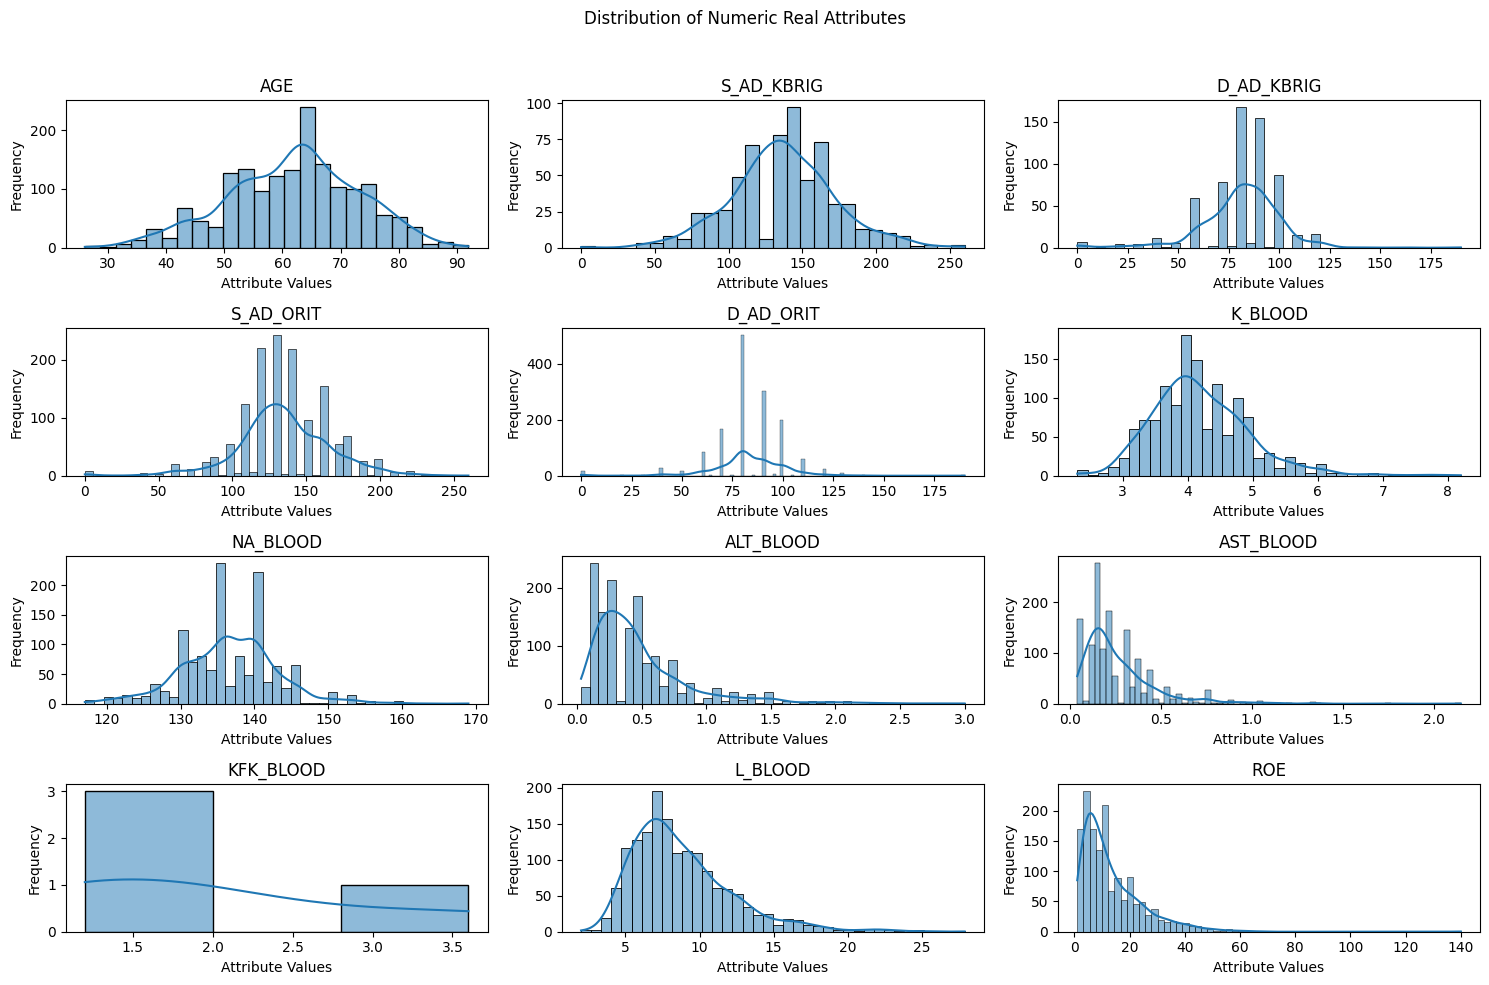

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of Numeric Real Attributes')

axes = axes.flatten()

for i, column in enumerate(df_selected.columns):
    sns.histplot(df_selected[column], kde=True, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Attribute Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [7]:
df_selected.shape

(1700, 12)

In [8]:
df_selected.describe()

,AGE,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE
count,1692.000000,624.000000,624.000000,1433.000000,1433.000000,1329.000000,1325.000000,1416.000000,1415.000000,4.000000,1575.000000,1497.000000
mean,61.856974,136.907051,81.394231,134.588276,82.749477,4.191422,136.550943,0.481455,0.263717,2.000000,8.782914,13.444890
std,11.259936,34.997835,19.745045,31.348388,18.321063,0.754076,6.512120,0.387261,0.201802,1.095445,3.400557,11.296316
min,26.000000,0.000000,0.000000,0.000000,0.000000,2.300000,117.000000,0.030000,0.040000,1.200000,2.000000,1.000000
25%,54.000000,120.000000,70.000000,120.000000,80.000000,3.700000,133.000000,0.230000,0.150000,1.350000,6.400000,5.000000
50%,63.000000,140.000000,80.000000,130.000000,80.000000,4.100000,136.000000,0.380000,0.220000,1.600000,8.000000,10.000000
75%,70.000000,160.000000,90.000000,150.000000,90.000000,4.600000,140.000000,0.610000,0.330000,2.250000,10.450000,18.000000
max,92.000000,260.000000,190.000000,260.000000,190.000000,8.200000,169.000000,3.000000,2.150000,3.600000,27.900000,140.000000


In [9]:
df_selected.isna().sum()

AGE              8
S_AD_KBRIG    1076
D_AD_KBRIG    1076
S_AD_ORIT      267
D_AD_ORIT      267
K_BLOOD        371
NA_BLOOD       375
ALT_BLOOD      284
AST_BLOOD      285
KFK_BLOOD     1696
L_BLOOD        125
ROE            203
dtype: int64

In [10]:
percentage_nan = df_selected.isna().mean() * 100
print(percentage_nan)

AGE            0.470588
S_AD_KBRIG    63.294118
D_AD_KBRIG    63.294118
S_AD_ORIT     15.705882
D_AD_ORIT     15.705882
K_BLOOD       21.823529
NA_BLOOD      22.058824
ALT_BLOOD     16.705882
AST_BLOOD     16.764706
KFK_BLOOD     99.764706
L_BLOOD        7.352941
ROE           11.941176
dtype: float64


##### I will be dropping columns S_AD_KBRIG, D_AD_KBRIG and KFK_BLOOD 

In [11]:
columns_to_drop = ['S_AD_KBRIG', 'D_AD_KBRIG', 'KFK_BLOOD']
df_selected_dropped = df_selected.drop(columns=columns_to_drop, axis=1)

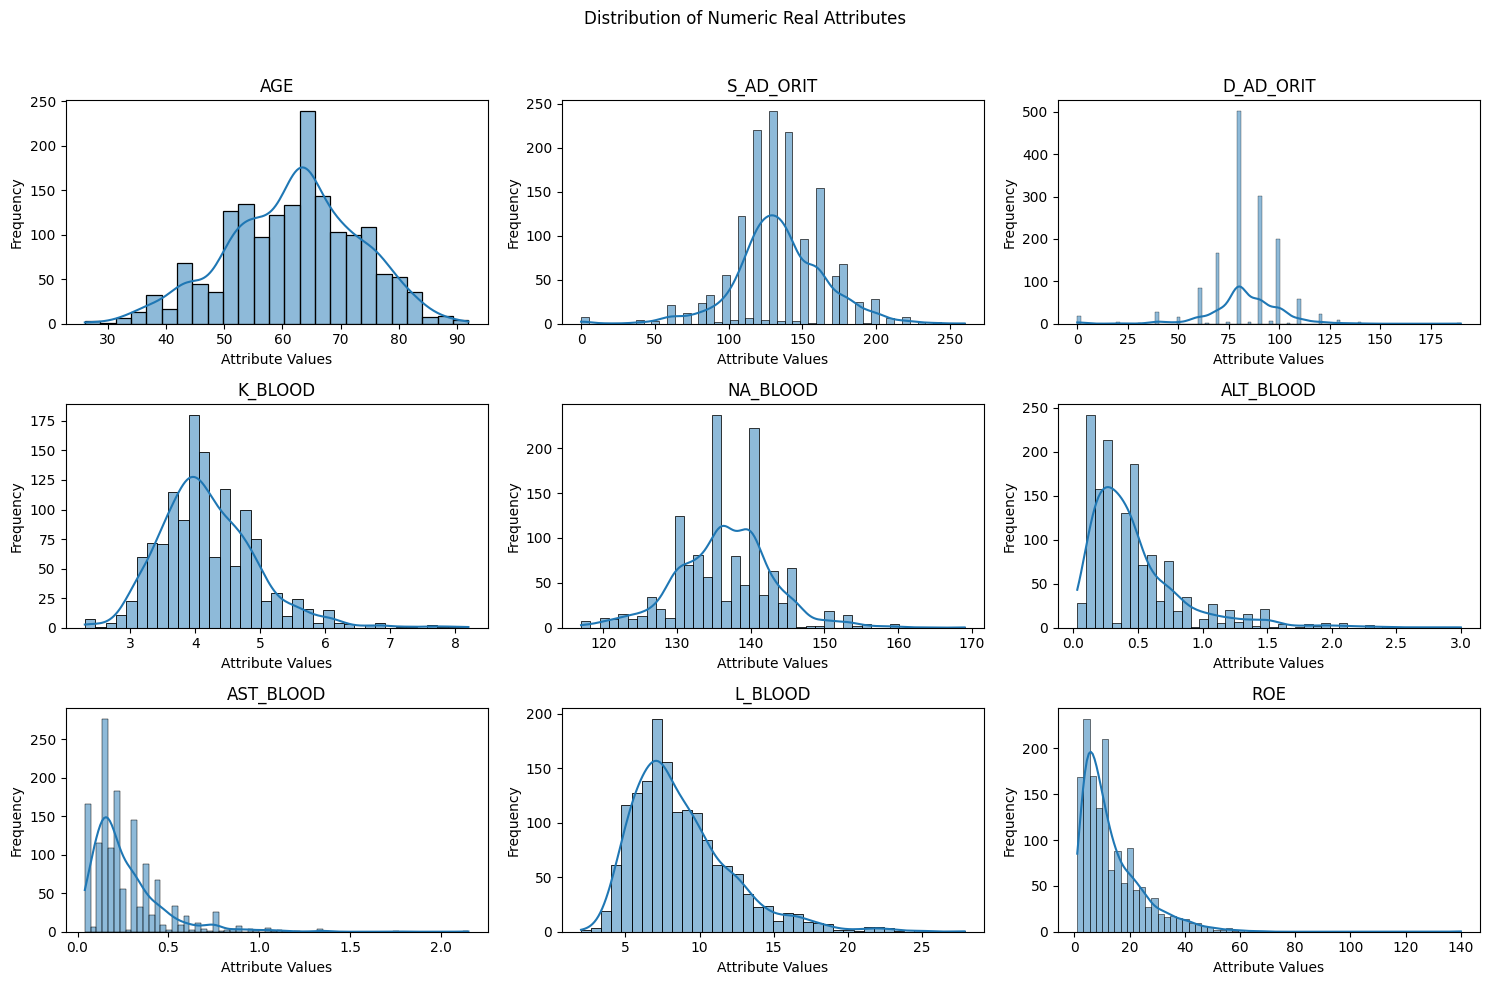

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of Numeric Real Attributes')

axes = axes.flatten()

for i, column in enumerate(df_selected_dropped.columns):
    sns.histplot(df_selected[column], kde=True, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Attribute Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

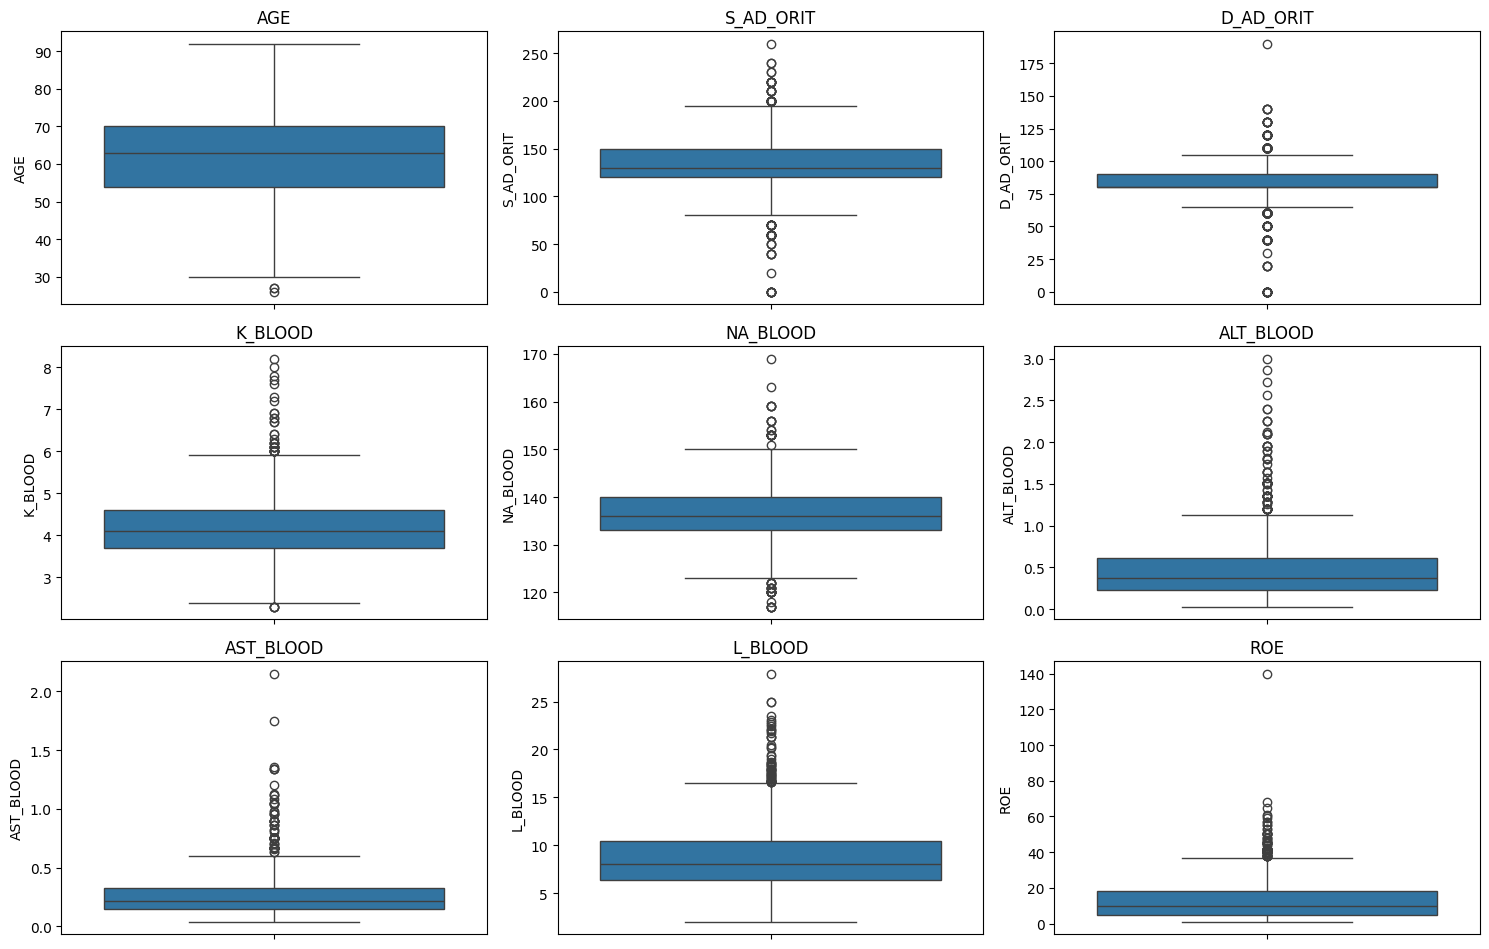

In [13]:
numeric_real_attributes = df_selected_dropped.columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numeric_real_attributes):
    sns.boxplot(y=df_selected_dropped[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [14]:
percentage_nan = df_selected_dropped.isna().mean() * 100
print(percentage_nan)

AGE           0.470588
S_AD_ORIT    15.705882
D_AD_ORIT    15.705882
K_BLOOD      21.823529
NA_BLOOD     22.058824
ALT_BLOOD    16.705882
AST_BLOOD    16.764706
L_BLOOD       7.352941
ROE          11.941176
dtype: float64


<Axes: >

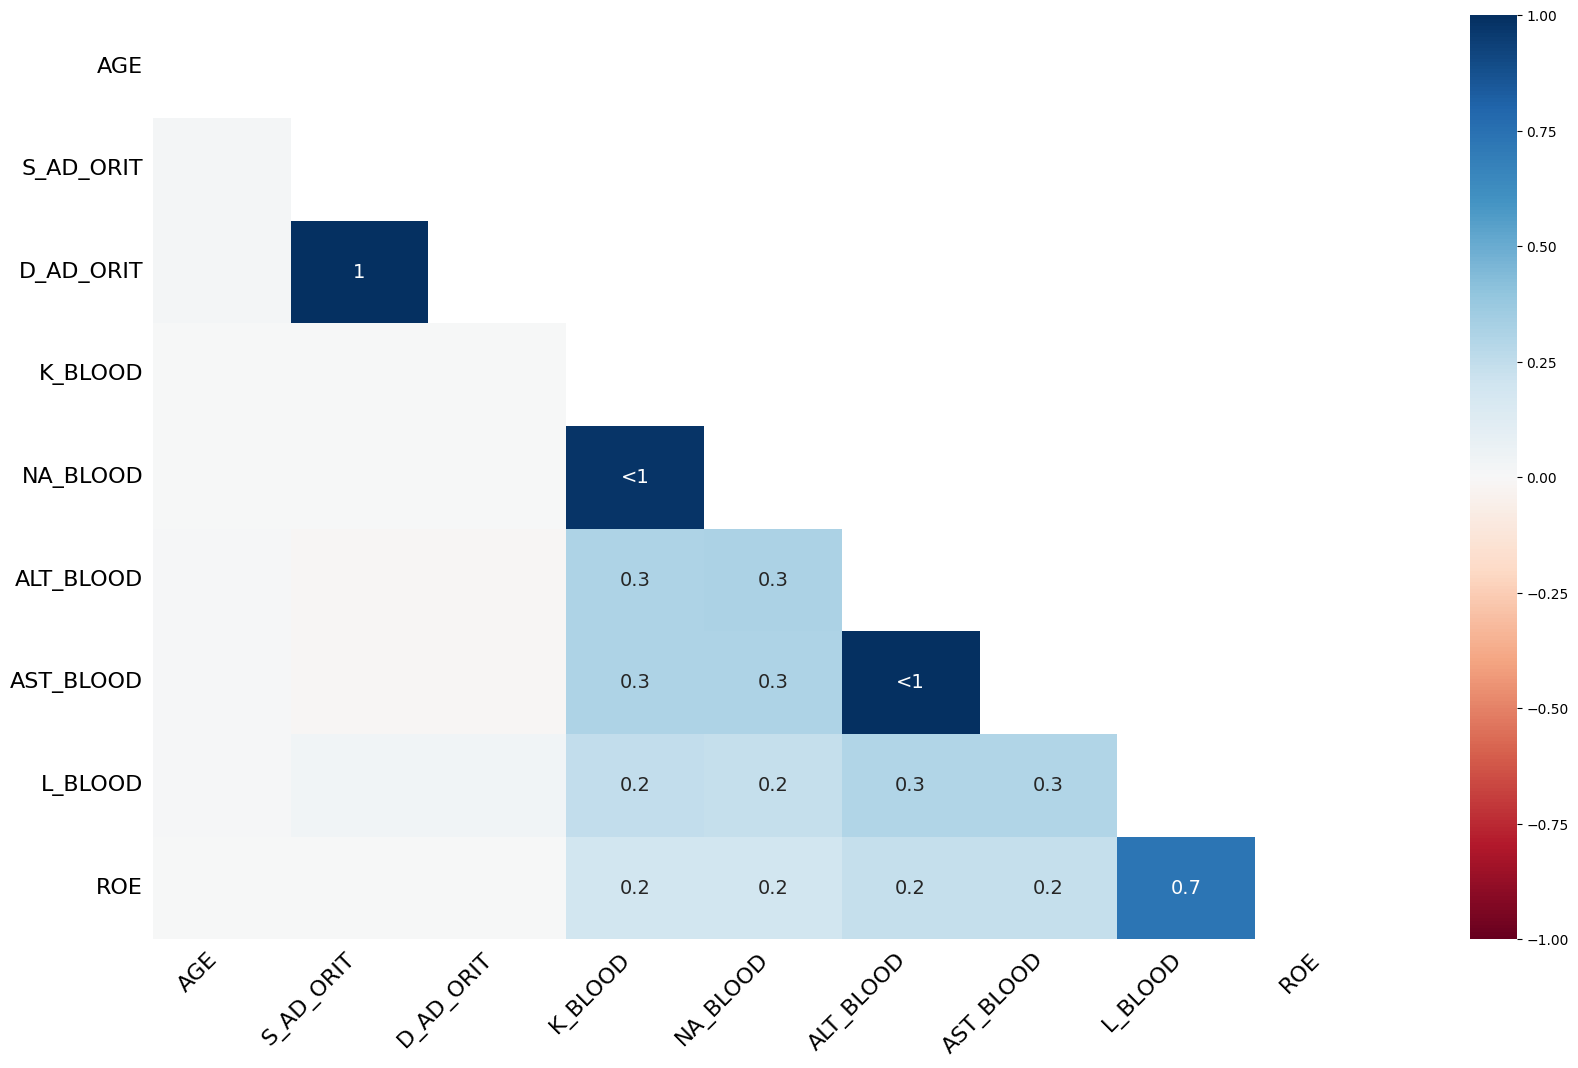

In [15]:
import missingno as msno
msno.heatmap(df_selected_dropped,labels=True)

##### We can see that the Systolic Blood Pressure and the Diastolic blood pressure have a postive correlation of 1 with respect to unobserved (missing) values


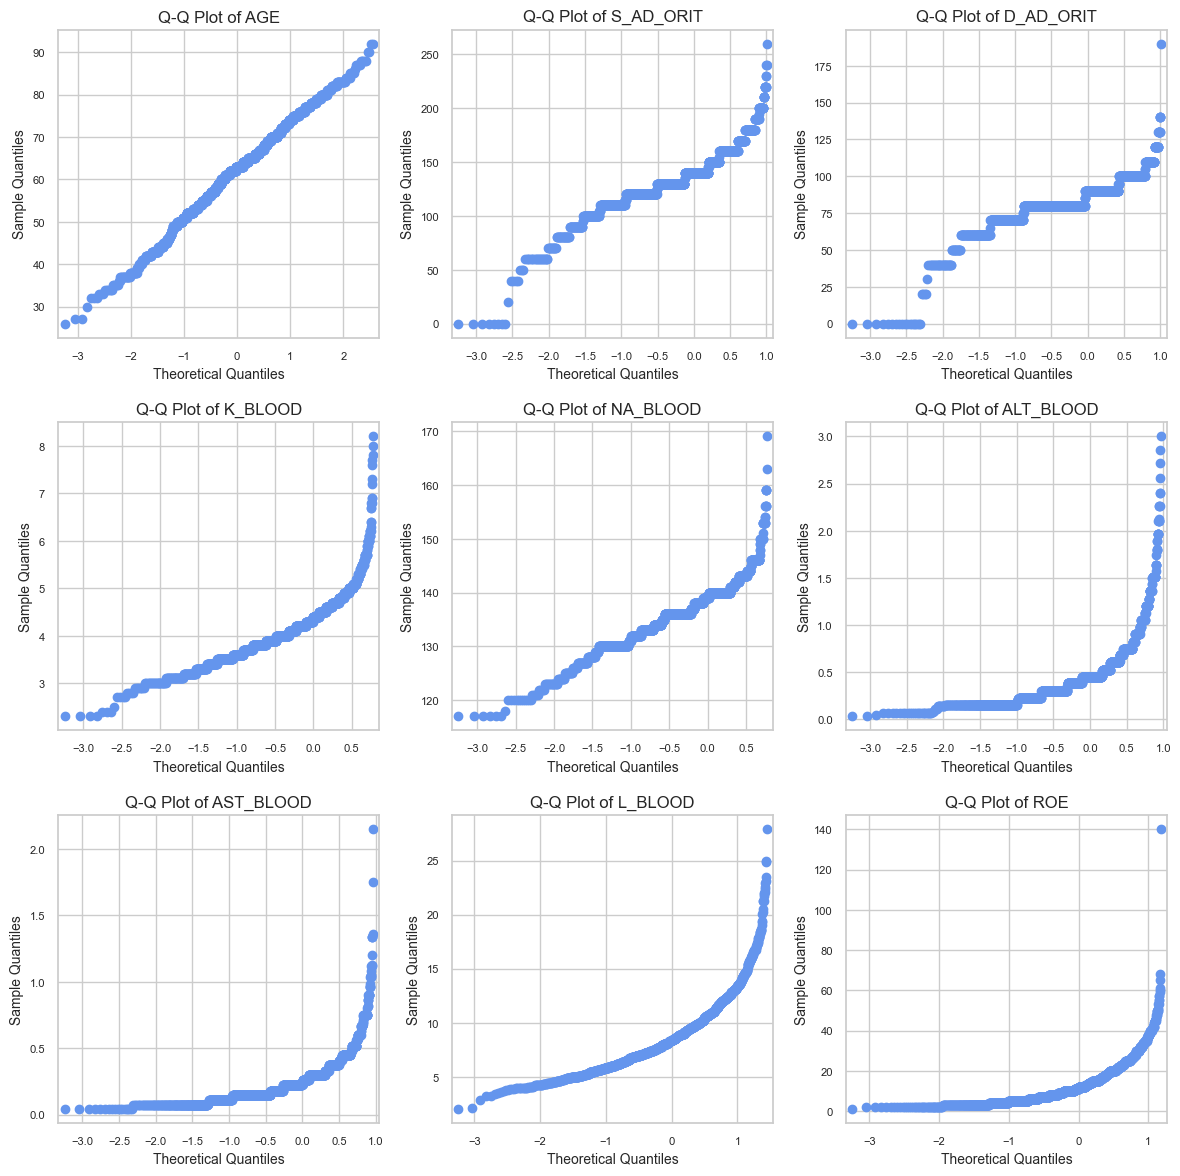

In [16]:
import seaborn as sns
import statsmodels.api as sm


columns_to_plot = df_selected_dropped.columns
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sm.qqplot(df_selected_dropped[column], line='s', ax=ax, markerfacecolor='cornflowerblue', markeredgecolor='cornflowerblue')
    ax.set_title(f'Q-Q Plot of {column}', fontsize=12)
    ax.set_xlabel('Theoretical Quantiles', fontsize=10)
    ax.set_ylabel('Sample Quantiles', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)


plt.tight_layout()
plt.show()


In [17]:
mean_age = round(df_selected_dropped['AGE'].mean())
df_selected_dropped['AGE'] = df_selected_dropped['AGE'].fillna(mean_age)


In [18]:
percentage_nan = df_selected_dropped.isna().mean() * 100
print(percentage_nan)

AGE           0.000000
S_AD_ORIT    15.705882
D_AD_ORIT    15.705882
K_BLOOD      21.823529
NA_BLOOD     22.058824
ALT_BLOOD    16.705882
AST_BLOOD    16.764706
L_BLOOD       7.352941
ROE          11.941176
dtype: float64


In [19]:
df_selected_dropped.head()

,AGE,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE
0,77.0,180.0,100.0,4.7,138.0,NaN,NaN,8.0,16.0
1,55.0,120.0,90.0,3.5,132.0,0.38,0.18,7.8,3.0
2,52.0,180.0,100.0,4.0,132.0,0.30,0.11,10.8,NaN
3,68.0,120.0,70.0,3.9,146.0,0.75,0.37,NaN,NaN
4,60.0,160.0,90.0,3.5,132.0,0.45,0.22,8.3,NaN


In [20]:
from sklearn.impute import KNNImputer


columns_to_exclude = ['AGE']
columns_to_impute = [col for col in df_selected_dropped.columns if col not in columns_to_exclude]
data_to_impute = df_selected_dropped[columns_to_impute].values
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(data_to_impute)
df_imputed = pd.DataFrame(imputed_data, columns=columns_to_impute)
df_imputed['AGE'] = df_selected_dropped['AGE']


In [21]:
df_imputed.head()

,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,AGE
0,180.0,100.0,4.7,138.0,0.33,0.168,8.00,16.0,77.0
1,120.0,90.0,3.5,132.0,0.38,0.180,7.80,3.0,55.0
2,180.0,100.0,4.0,132.0,0.30,0.110,10.80,16.4,52.0
3,120.0,70.0,3.9,146.0,0.75,0.370,7.26,10.2,68.0
4,160.0,90.0,3.5,132.0,0.45,0.220,8.30,19.4,60.0


In [22]:
df_imputed.shape

(1700, 9)

In [23]:
numerical_columns = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE']
df_cat = df.drop(columns=numerical_columns)
df_cat.head()


,ID,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,5,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
unique_cat_values = df_cat.apply(lambda x: x.unique())
pd.set_option('display.max_rows', None)
print(unique_cat_values)

ID               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
SEX                                                         [1, 0]
INF_ANAM                                 [2.0, 1.0, 0.0, 3.0, nan]
STENOK_AN                 [1.0, 0.0, 6.0, 5.0, 2.0, 3.0, 4.0, nan]
FK_STENOK                           [1.0, 0.0, 2.0, 3.0, 4.0, nan]
IBS_POST                                      [2.0, 0.0, 1.0, nan]
IBS_NASL                                           [nan, 0.0, 1.0]
GB                                       [3.0, 0.0, 2.0, 1.0, nan]
SIM_GIPERT                                         [0.0, 1.0, nan]
DLIT_AG              [7.0, 0.0, 2.0, 3.0, 6.0, 1.0, 5.0, nan, 4.0]
ZSN_A                               [0.0, 1.0, 2.0, 3.0, 4.0, nan]
nr_11                                              [0.0, 1.0, nan]
nr_01                                              [0.0, nan, 1.0]
nr_02                                              [0.0, 1.0, nan]
nr_03                                              [0.0, 1.0, 

In [25]:
df_cat = df_cat.drop(columns=['ID'])

In [26]:
df_cat.head()

,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_cat.shape

(1700, 111)

In [28]:

df_cat_ordinal = df_cat[['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'DLIT_AG', 'ant_im', 'lat_im', 'inf_im', 'post_im',
                        'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n']]


In [29]:
df_cat_ordinal.shape

(1700, 20)

In [30]:
df_cat.shape

(1700, 111)

In [31]:
df.shape

(1700, 124)

In [32]:
ordinal_columns = ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'DLIT_AG', 'ant_im', 'lat_im', 'inf_im', 'post_im',
                        'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n']
df_cat_nominal = df_cat.drop(columns=ordinal_columns)


In [33]:
df_cat_nominal.shape

(1700, 91)

In [34]:
df_cat_nominal.columns


Index(['SEX', 'IBS_NASL', 'SIM_GIPERT', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02',
       'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07',
       'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03',
       'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06',
       'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST',
       'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02',
       'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08',
       'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04',
       'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09',
       'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04',
       'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08',
       'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12',
       'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05',
       'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', '

In [35]:
columns_to_remove = ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
                     'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']

df_cat_nominal = df_cat_nominal.drop(columns=columns_to_remove)

In [36]:
df_cat_nominal.shape

(1700, 79)

In [37]:
column_to_move = 'ZSN_A'
df_cat_ordinal = pd.concat([df_cat_ordinal, df_cat_nominal[column_to_move]], axis=1)
df_cat_nominal = df_cat_nominal.drop(columns=[column_to_move])

In [38]:
df_cat_nominal.shape

(1700, 78)

In [39]:
df_cat_ordinal.shape

(1700, 21)

##### So we have 12 real numeric continuous attributes, 21 ordinal categorical attributes and 78 nominal categorical attributes, and the ID column is discarded, and we have a partial ordered attribute, summing up we match the original shape of the dataset. 12 + 78 + 21 + 1 + 12 (unused target attributes) = 124, (1700, 124)

In [40]:
df_cat_ordinal.head()

,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ant_im,lat_im,inf_im,post_im,...,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,ZSN_A
0,2.0,1.0,1.0,2.0,3.0,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,2.0,2.0,2.0,4.0,1.0,0.0,0.0,...,3.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,0.0
3,0.0,0.0,0.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,2.0,3.0,7.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


##### Our target column is "ZSN" whcih represents, yes or no -> Chronic Heart Failure

In [42]:
df['ZSN']

0       0
1       0
2       0
3       1
4       0
5       0
6       1
7       0
8       0
9       1
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      1
18      0
19      0
20      0
21      1
22      1
23      0
24      0
25      0
26      1
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      1
37      0
38      1
39      1
40      1
41      1
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      1
50      1
51      1
52      0
53      1
54      1
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      1
65      1
66      1
67      0
68      0
69      0
70      1
71      0
72      1
73      0
74      0
75      0
76      1
77      0
78      1
79      1
80      0
81      1
82      0
83      0
84      1
85      1
86      1
87      1
88      0
89      1
90      0
91      1
92      1
93      0
94      0
95      1
96      0
97      1
98      0
99      0


In [43]:
column_to_move = 'ZSN'
df_cat_nominal = pd.concat([df_cat_nominal, df[column_to_move]], axis=1)


In [44]:
df_cat_nominal.head()

,SEX,IBS_NASL,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,...,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


In [45]:
percentage_nan = df_cat_nominal.isna().mean() * 100
print(percentage_nan)

SEX               0.000000
IBS_NASL         95.764706
SIM_GIPERT        0.470588
nr_11             1.235294
nr_01             1.235294
nr_02             1.235294
nr_03             1.235294
nr_04             1.235294
nr_07             1.235294
nr_08             1.235294
np_01             1.058824
np_04             1.058824
np_05             1.058824
np_07             1.058824
np_08             1.058824
np_09             1.058824
np_10             1.058824
endocr_01         0.647059
endocr_02         0.588235
endocr_03         0.588235
zab_leg_01        0.411765
zab_leg_02        0.411765
zab_leg_03        0.411765
zab_leg_04        0.411765
zab_leg_06        0.411765
O_L_POST          0.705882
K_SH_POST         0.882353
MP_TP_POST        0.823529
SVT_POST          0.705882
GT_POST           0.705882
FIB_G_POST        0.705882
IM_PG_P           0.058824
ritm_ecg_p_01     8.941176
ritm_ecg_p_02     8.941176
ritm_ecg_p_04     8.941176
ritm_ecg_p_06     8.941176
ritm_ecg_p_07     8.941176
r

##### Dropping IBS_NASL

In [46]:
df_cat_nominal = df_cat_nominal.drop("IBS_NASL", axis=1)

In [47]:
df_cat_nominal.shape

(1700, 78)

In [48]:
modes = df_cat_nominal.mode()
pd.set_option('display.max_columns', None)
print("Mode of each column:")
print(modes)

Mode of each column:
   SEX  SIM_GIPERT  nr_11  nr_01  nr_02  nr_03  nr_04  nr_07  nr_08  np_01  \
0    1         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   np_04  np_05  np_07  np_08  np_09  np_10  endocr_01  endocr_02  endocr_03  \
0    0.0    0.0    0.0    0.0    0.0    0.0        0.0        0.0        0.0   

   zab_leg_01  zab_leg_02  zab_leg_03  zab_leg_04  zab_leg_06  O_L_POST  \
0         0.0         0.0         0.0         0.0         0.0       0.0   

   K_SH_POST  MP_TP_POST  SVT_POST  GT_POST  FIB_G_POST  IM_PG_P  \
0        0.0         0.0       0.0      0.0         0.0      0.0   

   ritm_ecg_p_01  ritm_ecg_p_02  ritm_ecg_p_04  ritm_ecg_p_06  ritm_ecg_p_07  \
0            1.0            0.0            0.0            0.0            0.0   

   ritm_ecg_p_08  n_r_ecg_p_01  n_r_ecg_p_02  n_r_ecg_p_03  n_r_ecg_p_04  \
0            0.0           0.0           0.0           0.0           0.0   

   n_r_ecg_p_05  n_r_ecg_p_06  n_r_ecg_p_08  n_r_ecg_p_09  

In [49]:
high_missing_values = ['GIPO_K', 'GIPER_NA', 'NA_KB', 'NOT_NA_KB', 'LID_KB']


low_missing_values = [col for col in df_cat_nominal.columns if col not in high_missing_values]
modes = df_cat_nominal[low_missing_values].mode().iloc[0]
#df_cat_nominal[low_missing_values] = df_cat_nominal[low_missing_values].fillna(modes)

In [50]:
low_missing_values

['SEX',
 'SIM_GIPERT',
 'nr_11',
 'nr_01',
 'nr_02',
 'nr_03',
 'nr_04',
 'nr_07',
 'nr_08',
 'np_01',
 'np_04',
 'np_05',
 'np_07',
 'np_08',
 'np_09',
 'np_10',
 'endocr_01',
 'endocr_02',
 'endocr_03',
 'zab_leg_01',
 'zab_leg_02',
 'zab_leg_03',
 'zab_leg_04',
 'zab_leg_06',
 'O_L_POST',
 'K_SH_POST',
 'MP_TP_POST',
 'SVT_POST',
 'GT_POST',
 'FIB_G_POST',
 'IM_PG_P',
 'ritm_ecg_p_01',
 'ritm_ecg_p_02',
 'ritm_ecg_p_04',
 'ritm_ecg_p_06',
 'ritm_ecg_p_07',
 'ritm_ecg_p_08',
 'n_r_ecg_p_01',
 'n_r_ecg_p_02',
 'n_r_ecg_p_03',
 'n_r_ecg_p_04',
 'n_r_ecg_p_05',
 'n_r_ecg_p_06',
 'n_r_ecg_p_08',
 'n_r_ecg_p_09',
 'n_r_ecg_p_10',
 'n_p_ecg_p_01',
 'n_p_ecg_p_03',
 'n_p_ecg_p_04',
 'n_p_ecg_p_05',
 'n_p_ecg_p_06',
 'n_p_ecg_p_07',
 'n_p_ecg_p_08',
 'n_p_ecg_p_09',
 'n_p_ecg_p_10',
 'n_p_ecg_p_11',
 'n_p_ecg_p_12',
 'fibr_ter_01',
 'fibr_ter_02',
 'fibr_ter_03',
 'fibr_ter_05',
 'fibr_ter_06',
 'fibr_ter_07',
 'fibr_ter_08',
 'NITR_S',
 'LID_S_n',
 'B_BLOK_S_n',
 'ANT_CA_S_n',
 'GEPAR_S_n',

In [51]:
len(low_missing_values)

73

In [52]:
len(modes)

73

In [53]:
modes

SEX              1.0
SIM_GIPERT       0.0
nr_11            0.0
nr_01            0.0
nr_02            0.0
nr_03            0.0
nr_04            0.0
nr_07            0.0
nr_08            0.0
np_01            0.0
np_04            0.0
np_05            0.0
np_07            0.0
np_08            0.0
np_09            0.0
np_10            0.0
endocr_01        0.0
endocr_02        0.0
endocr_03        0.0
zab_leg_01       0.0
zab_leg_02       0.0
zab_leg_03       0.0
zab_leg_04       0.0
zab_leg_06       0.0
O_L_POST         0.0
K_SH_POST        0.0
MP_TP_POST       0.0
SVT_POST         0.0
GT_POST          0.0
FIB_G_POST       0.0
IM_PG_P          0.0
ritm_ecg_p_01    1.0
ritm_ecg_p_02    0.0
ritm_ecg_p_04    0.0
ritm_ecg_p_06    0.0
ritm_ecg_p_07    0.0
ritm_ecg_p_08    0.0
n_r_ecg_p_01     0.0
n_r_ecg_p_02     0.0
n_r_ecg_p_03     0.0
n_r_ecg_p_04     0.0
n_r_ecg_p_05     0.0
n_r_ecg_p_06     0.0
n_r_ecg_p_08     0.0
n_r_ecg_p_09     0.0
n_r_ecg_p_10     0.0
n_p_ecg_p_01     0.0
n_p_ecg_p_03 

In [54]:
for col in low_missing_values:
    df_cat_nominal[col] = df_cat_nominal[col].fillna(modes[col])

In [55]:
df_cat_nominal.head()

,SEX,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,GIPER_NA,NA_KB,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


In [56]:
percentage_nan = df_cat_nominal.isna().mean() * 100
print(percentage_nan)

SEX               0.000000
SIM_GIPERT        0.000000
nr_11             0.000000
nr_01             0.000000
nr_02             0.000000
nr_03             0.000000
nr_04             0.000000
nr_07             0.000000
nr_08             0.000000
np_01             0.000000
np_04             0.000000
np_05             0.000000
np_07             0.000000
np_08             0.000000
np_09             0.000000
np_10             0.000000
endocr_01         0.000000
endocr_02         0.000000
endocr_03         0.000000
zab_leg_01        0.000000
zab_leg_02        0.000000
zab_leg_03        0.000000
zab_leg_04        0.000000
zab_leg_06        0.000000
O_L_POST          0.000000
K_SH_POST         0.000000
MP_TP_POST        0.000000
SVT_POST          0.000000
GT_POST           0.000000
FIB_G_POST        0.000000
IM_PG_P           0.000000
ritm_ecg_p_01     0.000000
ritm_ecg_p_02     0.000000
ritm_ecg_p_04     0.000000
ritm_ecg_p_06     0.000000
ritm_ecg_p_07     0.000000
ritm_ecg_p_08     0.000000
n

In [57]:
missing_columns = ['GIPO_K', 'GIPER_NA', 'NA_KB', 'NOT_NA_KB', 'LID_KB']
unique_values_dict = {}

for col in missing_columns:
    unique_values_dict[col] = df_cat_nominal[col].unique()

# Display unique values for each column
for col, unique_values in unique_values_dict.items():
    print(f"Unique values for {col}: {unique_values}")

Unique values for GIPO_K: [ 0.  1. nan]
Unique values for GIPER_NA: [ 0. nan  1.]
Unique values for NA_KB: [nan  1.  0.]
Unique values for NOT_NA_KB: [nan  0.  1.]
Unique values for LID_KB: [nan  1.  0.]


In [58]:
df_cat_ordinal.head()

,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ant_im,lat_im,inf_im,post_im,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,ZSN_A
0,2.0,1.0,1.0,2.0,3.0,7.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,2.0,2.0,2.0,4.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,0.0
3,0.0,0.0,0.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,2.0,3.0,7.0,4.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df_cat_nominal.head()

,SEX,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,GIPER_NA,NA_KB,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


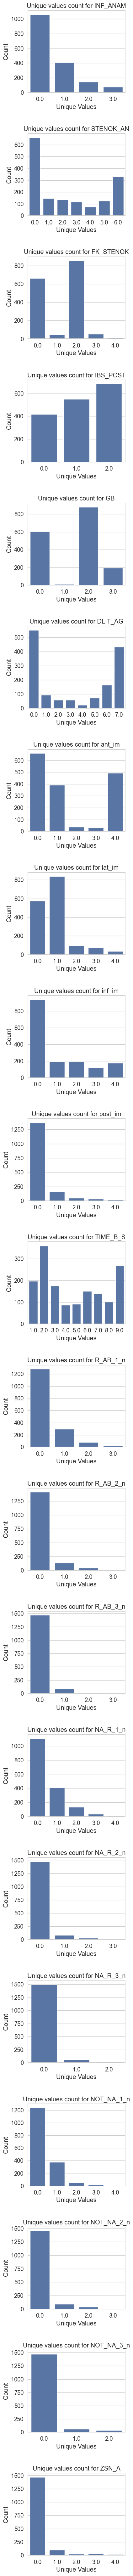

In [60]:
unique_value_counts = {}
for column in df_cat_ordinal.columns:
    unique_value_counts[column] = df_cat_ordinal[column].value_counts()


num_cols = len(df_cat_ordinal.columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(4, 5*num_cols), sharex=False)
plt.subplots_adjust(hspace=0.5)

for i, (column, counts) in enumerate(unique_value_counts.items()):
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i])
    axes[i].set_title(f'Unique values count for {column}')
    axes[i].set_xlabel('Unique Values')
    axes[i].set_ylabel('Count')

plt.show()

In [61]:
percentage_nan = df_cat_ordinal.isna().mean() * 100
print(percentage_nan)

INF_ANAM       0.235294
STENOK_AN      6.235294
FK_STENOK      4.294118
IBS_POST       3.000000
GB             0.529412
DLIT_AG       14.588235
ant_im         4.882353
lat_im         4.705882
inf_im         4.705882
post_im        4.235294
TIME_B_S       7.411765
R_AB_1_n       0.941176
R_AB_2_n       6.352941
R_AB_3_n       7.529412
NA_R_1_n       0.294118
NA_R_2_n       6.352941
NA_R_3_n       7.705882
NOT_NA_1_n     0.588235
NOT_NA_2_n     6.470588
NOT_NA_3_n     7.705882
ZSN_A          3.176471
dtype: float64


In [62]:
for column in df_cat_ordinal.columns:
    df_cat_ordinal[column].fillna(df_cat_ordinal[column].mode()[0], inplace=True)

In [63]:
percentage_nan = df_cat_ordinal.isna().mean() * 100
print(percentage_nan)

INF_ANAM      0.0
STENOK_AN     0.0
FK_STENOK     0.0
IBS_POST      0.0
GB            0.0
DLIT_AG       0.0
ant_im        0.0
lat_im        0.0
inf_im        0.0
post_im       0.0
TIME_B_S      0.0
R_AB_1_n      0.0
R_AB_2_n      0.0
R_AB_3_n      0.0
NA_R_1_n      0.0
NA_R_2_n      0.0
NA_R_3_n      0.0
NOT_NA_1_n    0.0
NOT_NA_2_n    0.0
NOT_NA_3_n    0.0
ZSN_A         0.0
dtype: float64


In [64]:
columns_to_impute = ['GIPO_K', 'GIPER_NA', 'NA_KB', 'NOT_NA_KB', 'LID_KB']


for column in columns_to_impute:
    mode_value = df_cat_nominal[column].mode()[0]  
    df_cat_nominal[column].fillna(mode_value, inplace=True) 

In [65]:
percentage_nan = df_cat_nominal.isna().mean() * 100
print(percentage_nan)

SEX              0.0
SIM_GIPERT       0.0
nr_11            0.0
nr_01            0.0
nr_02            0.0
nr_03            0.0
nr_04            0.0
nr_07            0.0
nr_08            0.0
np_01            0.0
np_04            0.0
np_05            0.0
np_07            0.0
np_08            0.0
np_09            0.0
np_10            0.0
endocr_01        0.0
endocr_02        0.0
endocr_03        0.0
zab_leg_01       0.0
zab_leg_02       0.0
zab_leg_03       0.0
zab_leg_04       0.0
zab_leg_06       0.0
O_L_POST         0.0
K_SH_POST        0.0
MP_TP_POST       0.0
SVT_POST         0.0
GT_POST          0.0
FIB_G_POST       0.0
IM_PG_P          0.0
ritm_ecg_p_01    0.0
ritm_ecg_p_02    0.0
ritm_ecg_p_04    0.0
ritm_ecg_p_06    0.0
ritm_ecg_p_07    0.0
ritm_ecg_p_08    0.0
n_r_ecg_p_01     0.0
n_r_ecg_p_02     0.0
n_r_ecg_p_03     0.0
n_r_ecg_p_04     0.0
n_r_ecg_p_05     0.0
n_r_ecg_p_06     0.0
n_r_ecg_p_08     0.0
n_r_ecg_p_09     0.0
n_r_ecg_p_10     0.0
n_p_ecg_p_01     0.0
n_p_ecg_p_03 

In [66]:
df_cat_ordinal.shape

(1700, 21)

In [67]:
df_cat_nominal.shape

(1700, 78)

In [68]:
df_imputed.head()

,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,AGE
0,180.0,100.0,4.7,138.0,0.33,0.168,8.00,16.0,77.0
1,120.0,90.0,3.5,132.0,0.38,0.180,7.80,3.0,55.0
2,180.0,100.0,4.0,132.0,0.30,0.110,10.80,16.4,52.0
3,120.0,70.0,3.9,146.0,0.75,0.370,7.26,10.2,68.0
4,160.0,90.0,3.5,132.0,0.45,0.220,8.30,19.4,60.0


In [69]:
df_cat_nominal = df_cat_nominal.astype(int)
df_cat_ordinal = df_cat_ordinal.astype(int)

In [70]:
df_cat_ordinal.head()

,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ant_im,lat_im,inf_im,post_im,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,ZSN_A
0,2,1,1,2,3,7,1,0,0,0,4,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,4,1,0,0,2,0,0,0,0,0,0,1,0,0,0
2,0,0,0,2,2,2,4,1,0,0,3,3,0,0,1,0,0,3,2,2,0
3,0,0,0,2,2,3,0,1,1,0,2,0,0,1,0,0,0,0,0,0,1
4,0,0,0,2,3,7,4,1,0,0,9,0,0,0,0,0,0,0,0,0,0


In [71]:
df_concatenated = pd.concat([df_imputed, df_cat_nominal, df_cat_ordinal], axis=1)

In [72]:
df_concatenated.head()

,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,AGE,SEX,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,GIPER_NA,NA_KB,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ant_im,lat_im,inf_im,post_im,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,ZSN_A
0,180.0,100.0,4.7,138.0,0.33,0.168,8.00,16.0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,2,1,1,2,3,7,1,0,0,0,4,0,0,1,0,0,0,0,0,0,0
1,120.0,90.0,3.5,132.0,0.38,0.180,7.80,3.0,55.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,4,1,0,0,2,0,0,0,0,0,0,1,0,0,0
2,180.0,100.0,4.0,132.0,0.30,0.110,10.80,16.4,52.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,2,2,2,4,1,0,0,3,3,0,0,1,0,0,3,2,2,0
3,120.0,70.0,3.9,146.0,0.75,0.370,7.26,10.2,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,2,2,3,0,1,1,0,2,0,0,1,0,0,0,0,0,0,1
4,160.0,90.0,3.5,132.0,0.45,0.220,8.30,19.4,60.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,2,3,7,4,1,0,0,9,0,0,0,0,0,0,0,0,0,0


In [73]:
df = df_concatenated.copy()

In [74]:
df.shape

(1700, 108)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop('ZSN', axis=1)  
y = df['ZSN']              


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
importances = clf.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Accuracy: 0.8
Feature: ZSN_A                Importance: 0.07
Feature: K_BLOOD              Importance: 0.05
Feature: L_BLOOD              Importance: 0.05
Feature: ROE                  Importance: 0.05
Feature: AGE                  Importance: 0.05
Feature: S_AD_ORIT            Importance: 0.04
Feature: NA_BLOOD             Importance: 0.04
Feature: ALT_BLOOD            Importance: 0.04
Feature: AST_BLOOD            Importance: 0.04
Feature: D_AD_ORIT            Importance: 0.03
Feature: TIME_B_S             Importance: 0.03
Feature: INF_ANAM             Importance: 0.02
Feature: STENOK_AN            Importance: 0.02
Feature: IBS_POST             Importance: 0.02
Feature: GB                   Importance: 0.02
Feature: DLIT_AG              Importance: 0.02
Feature: ant_im               Importance: 0.02
Feature: lat_im               Importance: 0.02
Feature: inf_im               Importance: 0.02
Feature: NA_R_1_n             Importance: 0.02
Feature: SEX                  Importance: 0.01

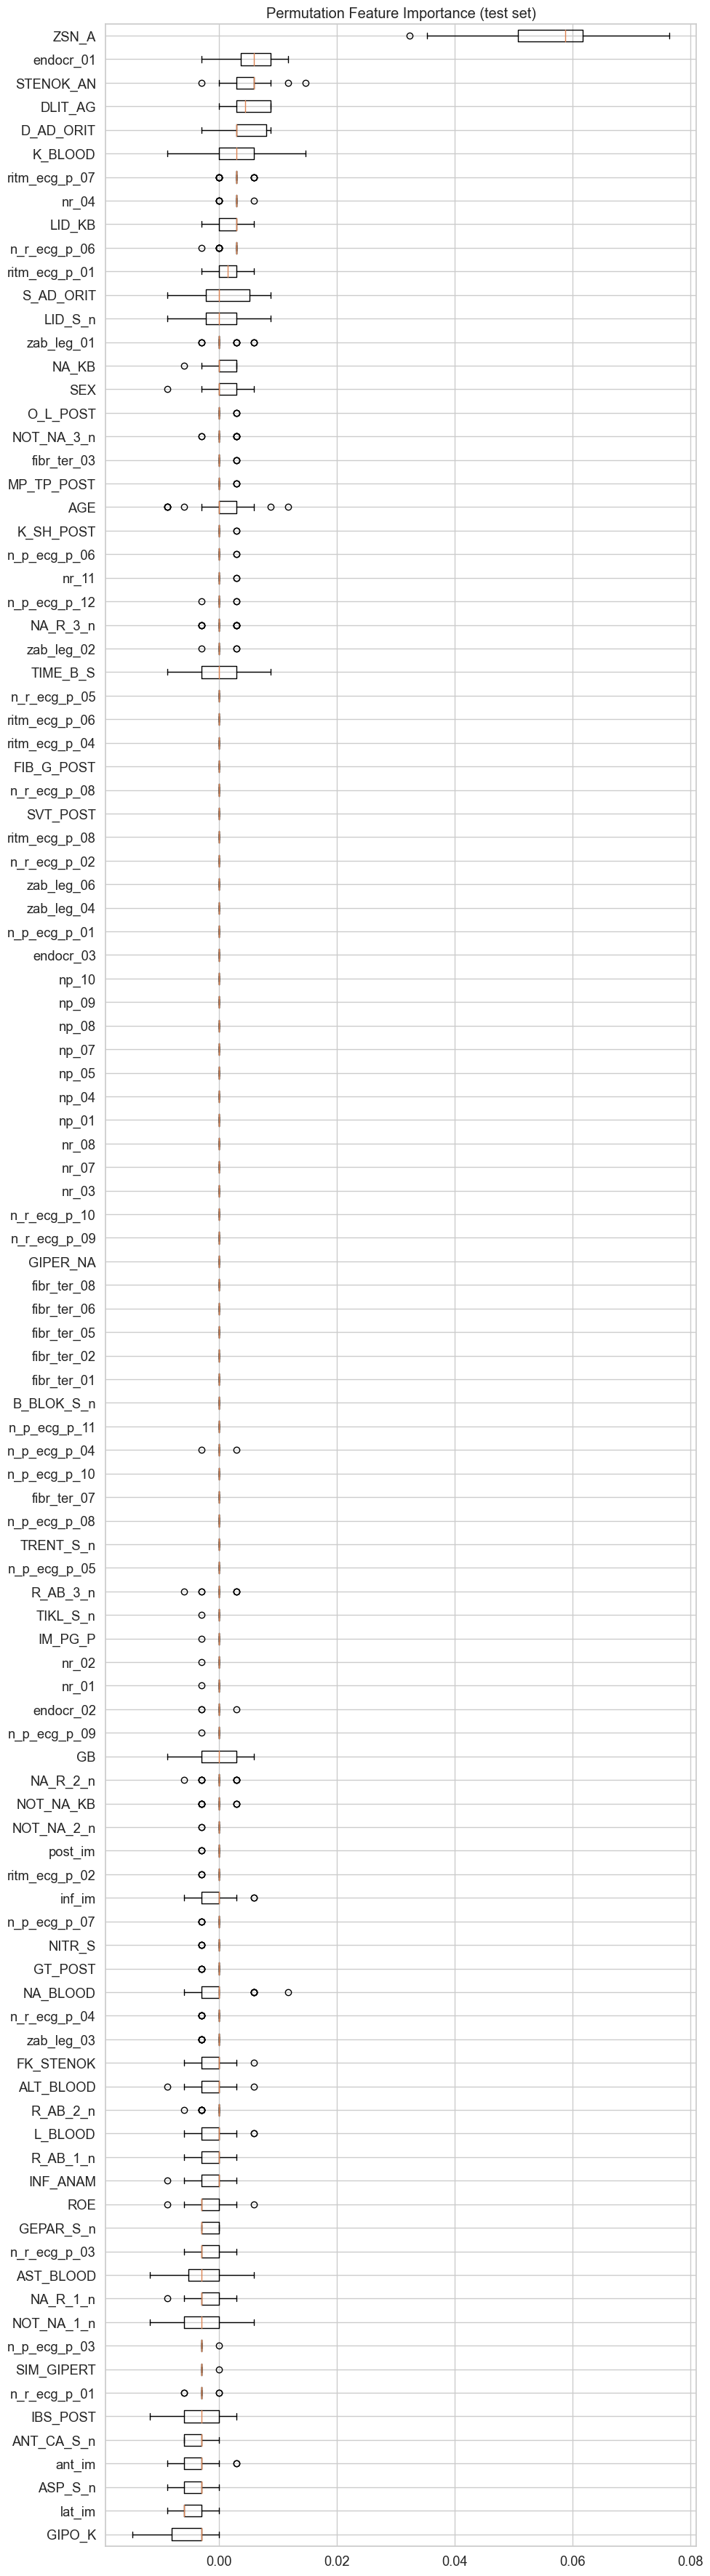

In [76]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)


sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, len(sorted_idx) / 3))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Feature Importance (test set)")
plt.tight_layout()
plt.show()

In [77]:
import xgboost as xgb
clf_xg = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
clf_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

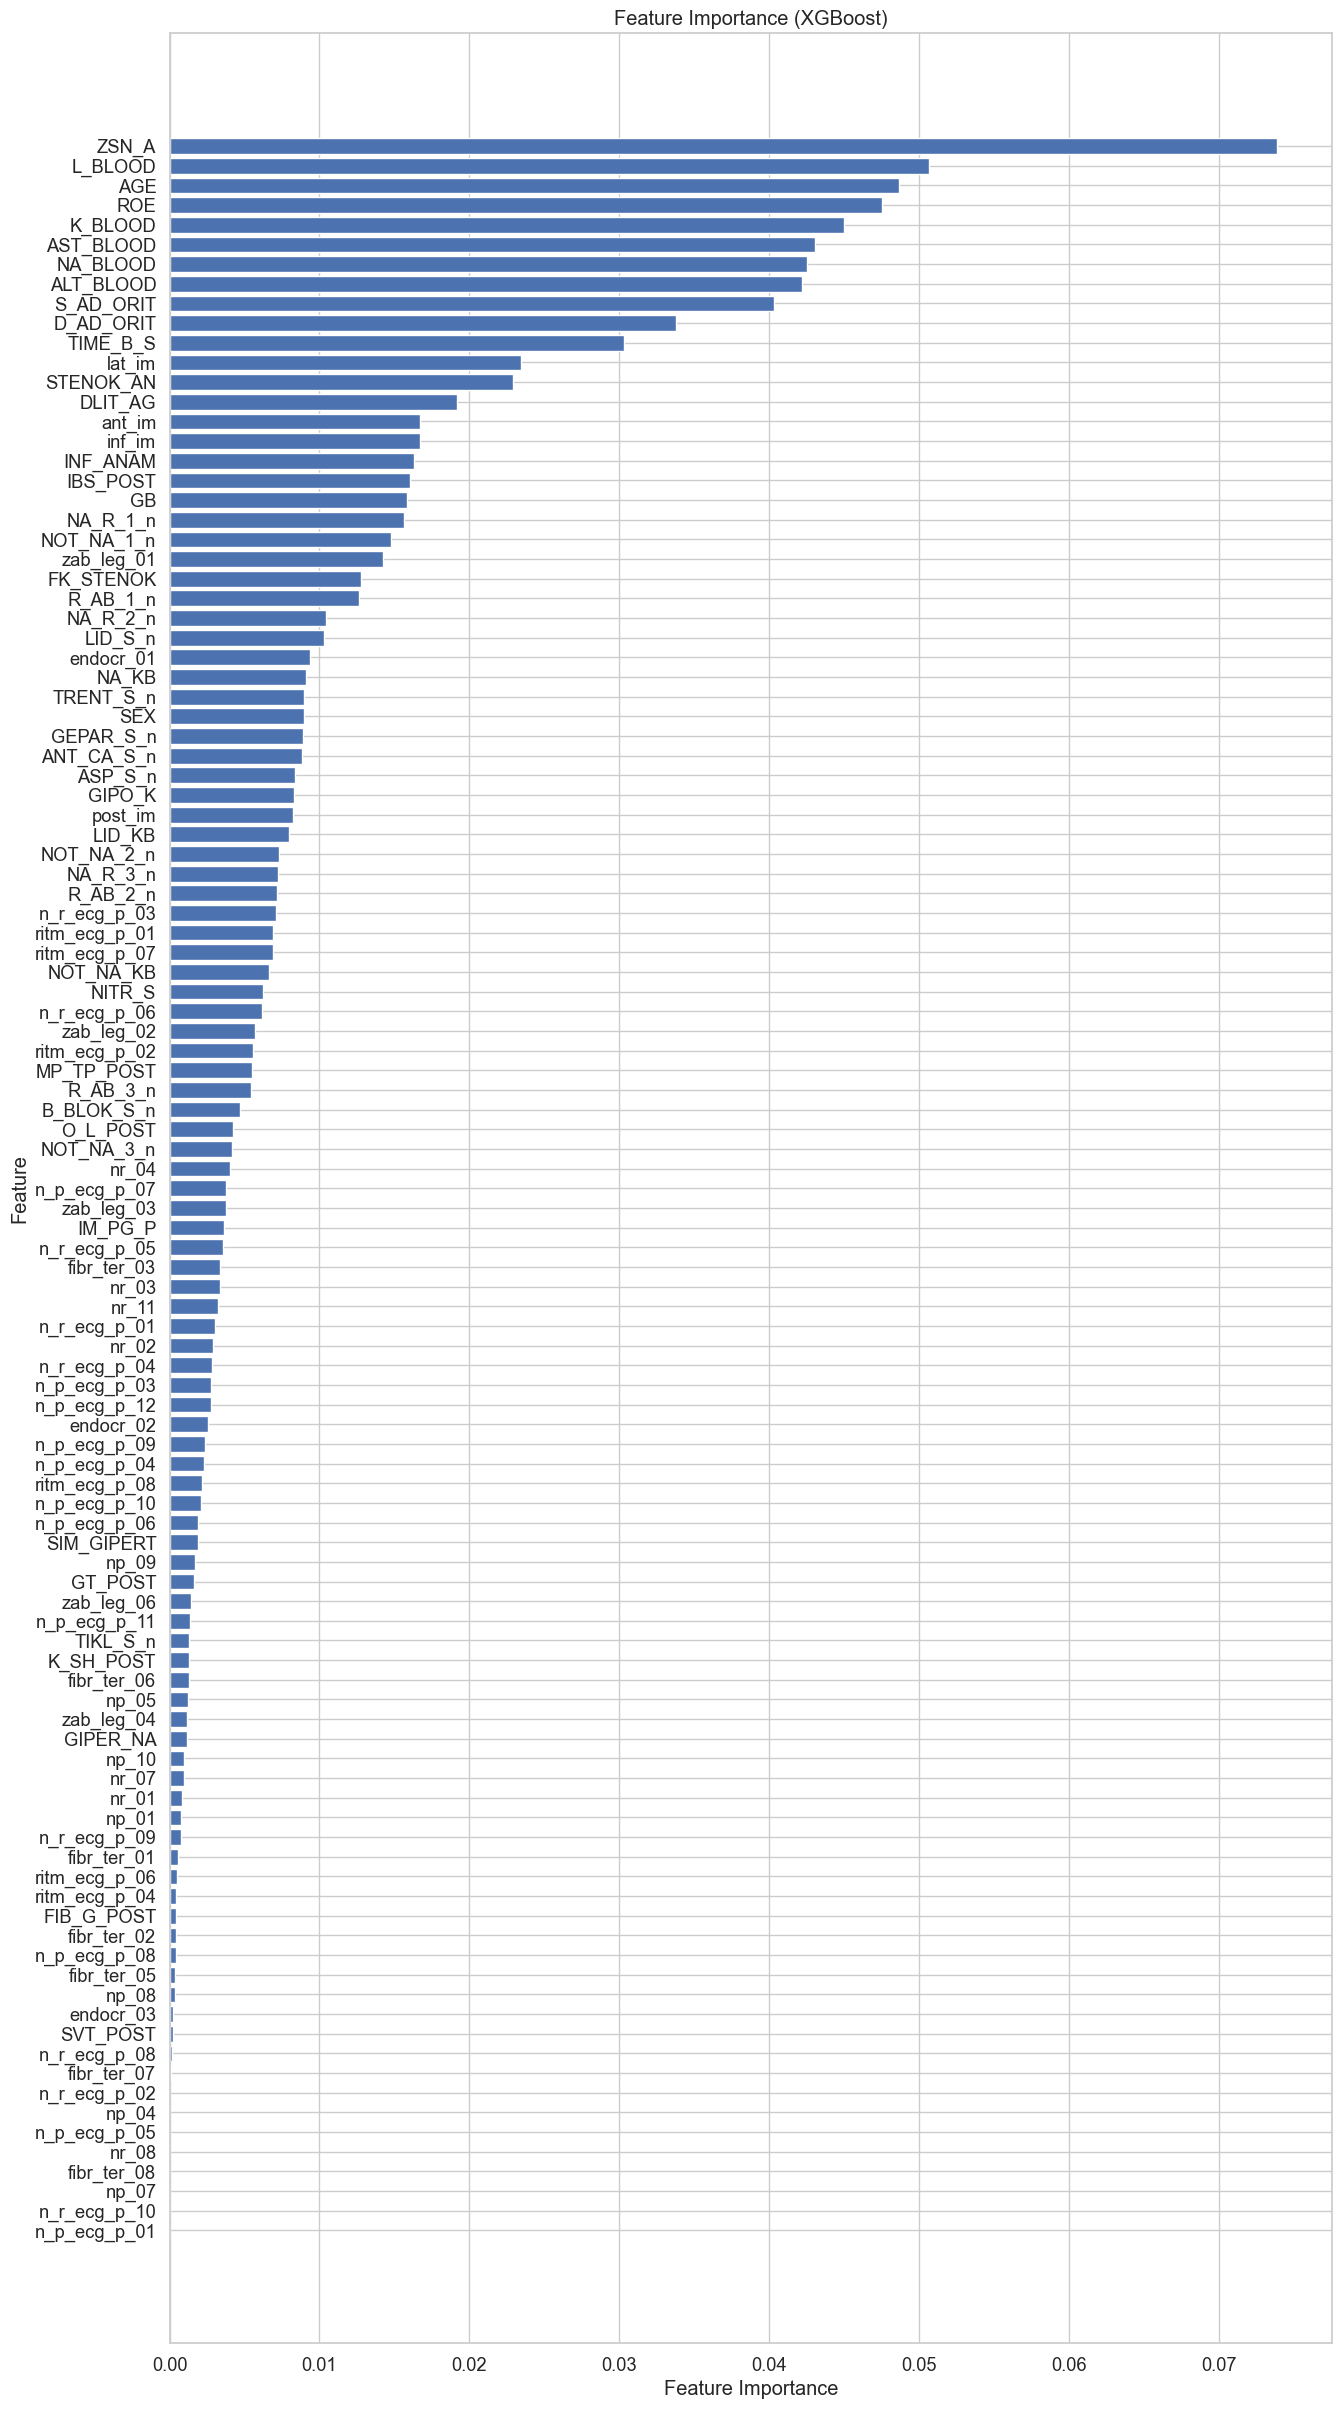

In [78]:
feature_importances = clf.feature_importances_


sorted_idx = feature_importances.argsort()[::-1]


plt.figure(figsize=(15, 30))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.gca().invert_yaxis() 
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.show()

In [79]:
top_30_idx = sorted_idx[:30]

In [80]:
top_30_idx

array([106,   6,   8,   7,   2,   5,   3,   4,   0,   1,  96,  93,  87,
        91,  92,  94,  86,  89,  90, 100, 103,  28,  88,  97, 101,  79,
        25,  75,  85,   9])

In [81]:
top_30_features = X.columns[top_30_idx]

In [82]:
top_30_features

Index(['ZSN_A', 'L_BLOOD', 'AGE', 'ROE', 'K_BLOOD', 'AST_BLOOD', 'NA_BLOOD',
       'ALT_BLOOD', 'S_AD_ORIT', 'D_AD_ORIT', 'TIME_B_S', 'lat_im',
       'STENOK_AN', 'DLIT_AG', 'ant_im', 'inf_im', 'INF_ANAM', 'IBS_POST',
       'GB', 'NA_R_1_n', 'NOT_NA_1_n', 'zab_leg_01', 'FK_STENOK', 'R_AB_1_n',
       'NA_R_2_n', 'LID_S_n', 'endocr_01', 'NA_KB', 'TRENT_S_n', 'SEX'],
      dtype='object')

In [83]:
X_train_top30 = X_train[top_30_features]
X_test_top30 = X_test[top_30_features]

model_top30 = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model_top30.fit(X_train_top30, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [84]:


y_pred_top30 = model_top30.predict(X_test_top30)
accuracy_top30 = accuracy_score(y_test, y_pred_top30)
print(f"Accuracy with Top 30 Features: {accuracy_top30}")


Accuracy with Top 30 Features: 0.7823529411764706


In [85]:
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0]  # Subsample ratio of columns when constructing each tree
}


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_top30, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best parameters found: ", best_params)
y_pred = best_model.predict(X_test_top30)
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy with Tuned Model: {accuracy}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Improved Accuracy with Tuned Model: 0.8117647058823529


In [89]:
df_cat_ordinal.shape

(1700, 21)

In [92]:
result = pd.read_pickle('/Users/saurabhsmac/Desktop/Projects/ML_Proj1/artifacts/proprocessor.pkl')

In [93]:
result

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', KNNImputer())]),
                                 ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG',
                                  'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD',
                                  'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD',
                                  'KFK_BLOOD', 'L_BLOOD', 'ROE']),
                                ('cat_ordinal_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['INF_ANAM', 'STENOK_AN', 'FK_STENO...
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['SEX', 'SIM_GIPERT', 'nr_11', 'nr_01',
                                  'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08',
                                  'np_01', 'np_04', 'np_05', 'np_07', 'np_08',
                                  'np_09', 'np_10', 'endocr_01', 'endocr_02',
                                  'endocr_03', 'zab_leg_01', 'zab_leg_02',
                                  'zab_leg_03', 'zab_leg_04', 'zab_leg_06',
                                  'O_L_POST', 'K_SH_POST', 'MP_TP_POST',
                                  'SVT_POST', 'GT_POST', 'FIB_G_POST', ...])])